In [2]:
%matplotlib inline
import numpy as np
import numpy.random as nd
import pandas as pd
import math
import matplotlib.pyplot as plt

import os
import seaborn as sns
sns.set(style="darkgrid")

from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Imputer
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import display

In [23]:
df = pd.read_csv('../data/Fundraising/FollowTheMoneyDownload20181102(031113).csv').sort_values(['Election_Year:id'], ascending=False)

In [6]:
df = pd.read_csv('../data/Fundraising/followthemoney_2009-2018.csv').sort_values(['Election_Year:id'], ascending=False)

In [7]:
df[0:2]

,request,Candidate:token,Candidate:id,Candidate,Candidate_Entity:token,Candidate_Entity:id,Candidate_Entity,Election_Status:token,Election_Status:id,Election_Status,...,Election_Type:id,Election_Type,Office_Sought:token,Office_Sought:id,Office_Sought,Incumbency_Status:token,Incumbency_Status:id,Incumbency_Status,#_of_Records,Total_$
5041,dt=1&f-fc=1&c-exi=1&c-r-ot=L&c-t-id=227113&c-t...,c-t-id,227113,"CANO JR, FERNANDO CHRISTIAN",c-t-eid,33819003,"CANO JR, FERNANDO CHRISTIAN",c-t-ftsts,Lost-Primary,Lost-Primary,...,1,Standard,c-r-osid,15216,US HOUSE DISTRICT NC 009,c-t-ico,O,Open,127,36912.95
3292,dt=1&f-fc=1&c-exi=1&c-r-ot=L&c-t-id=227370&c-t...,c-t-id,227370,"TILLEMANN, LEVI",c-t-eid,44044491,"TILLEMANN, LEVI",c-t-ftsts,Lost-Primary,Lost-Primary,...,1,Standard,c-r-osid,15054,US HOUSE DISTRICT CO 006,c-t-ico,O,Open,437,320594.21


In [8]:
df2=df[['Election_Jurisdiction:id', 'Election_Year:id', 'General_Party', '#_of_Records', 'Total_$']]
df2['Total_M$']=df2['Total_$'].copy()/1e6

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [9]:
df2.describe()

,Election_Year:id,#_of_Records,Total_$,Total_M$
count,10082.000000,10082.000000,1.008200e+04,10082.000000
mean,2013.537691,588.903591,4.993190e+05,0.499319
std,2.792038,2418.886648,1.067675e+06,1.067675
min,2009.000000,0.000000,-4.134868e+05,-0.413487
25%,2012.000000,0.000000,0.000000e+00,0.000000
50%,2014.000000,43.000000,3.691597e+04,0.036916
75%,2016.000000,658.750000,6.855454e+05,0.685545
max,2018.000000,168584.000000,3.410465e+07,34.104655


In [10]:
df2.head()

,Election_Jurisdiction:id,Election_Year:id,General_Party,#_of_Records,Total_$,Total_M$
5041,NC,2018,Democratic,127,36912.95,0.036913
3292,CO,2018,Democratic,437,320594.21,0.320594
3257,IL,2018,Democratic,676,337729.48,0.337729
3260,CA,2018,Democratic,428,337154.26,0.337154
3263,FL,2018,Republican,327,336020.30,0.336020


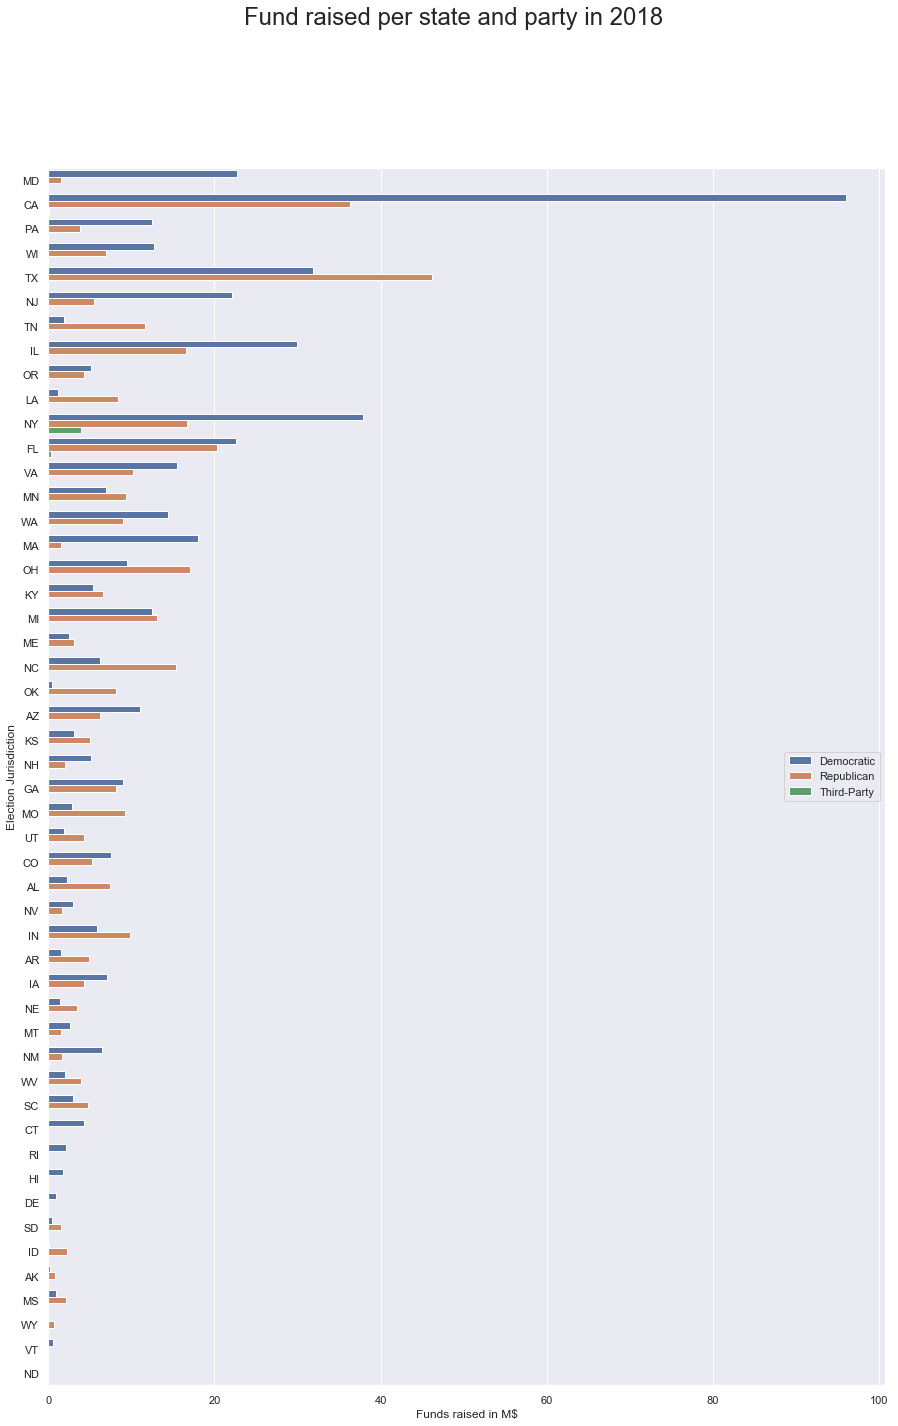

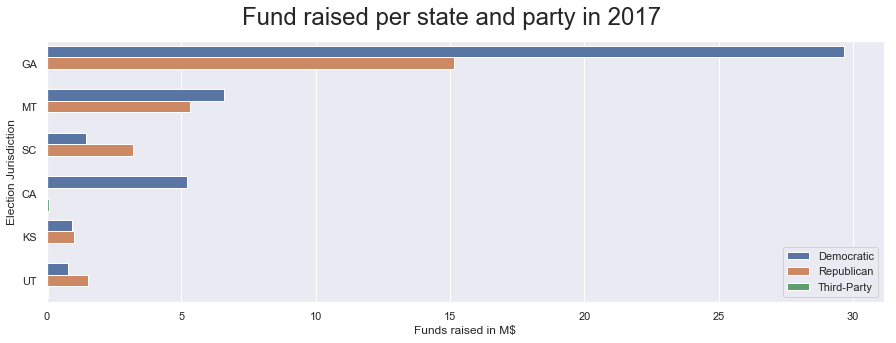

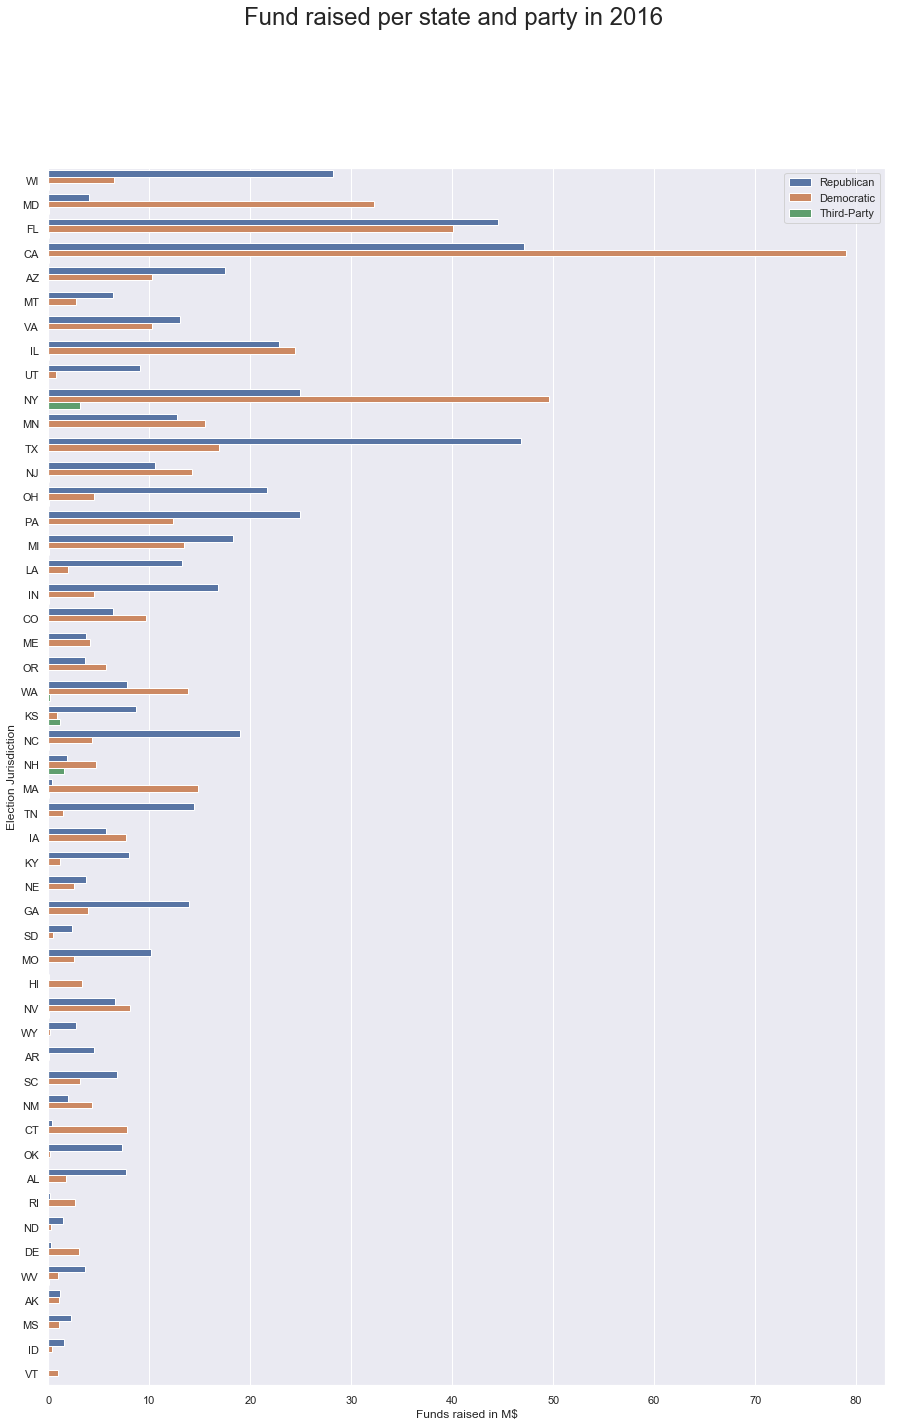

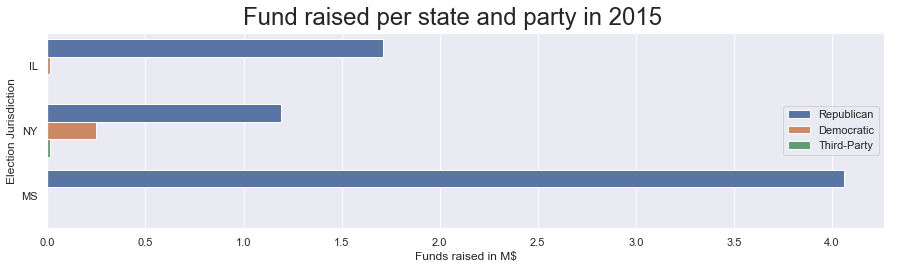

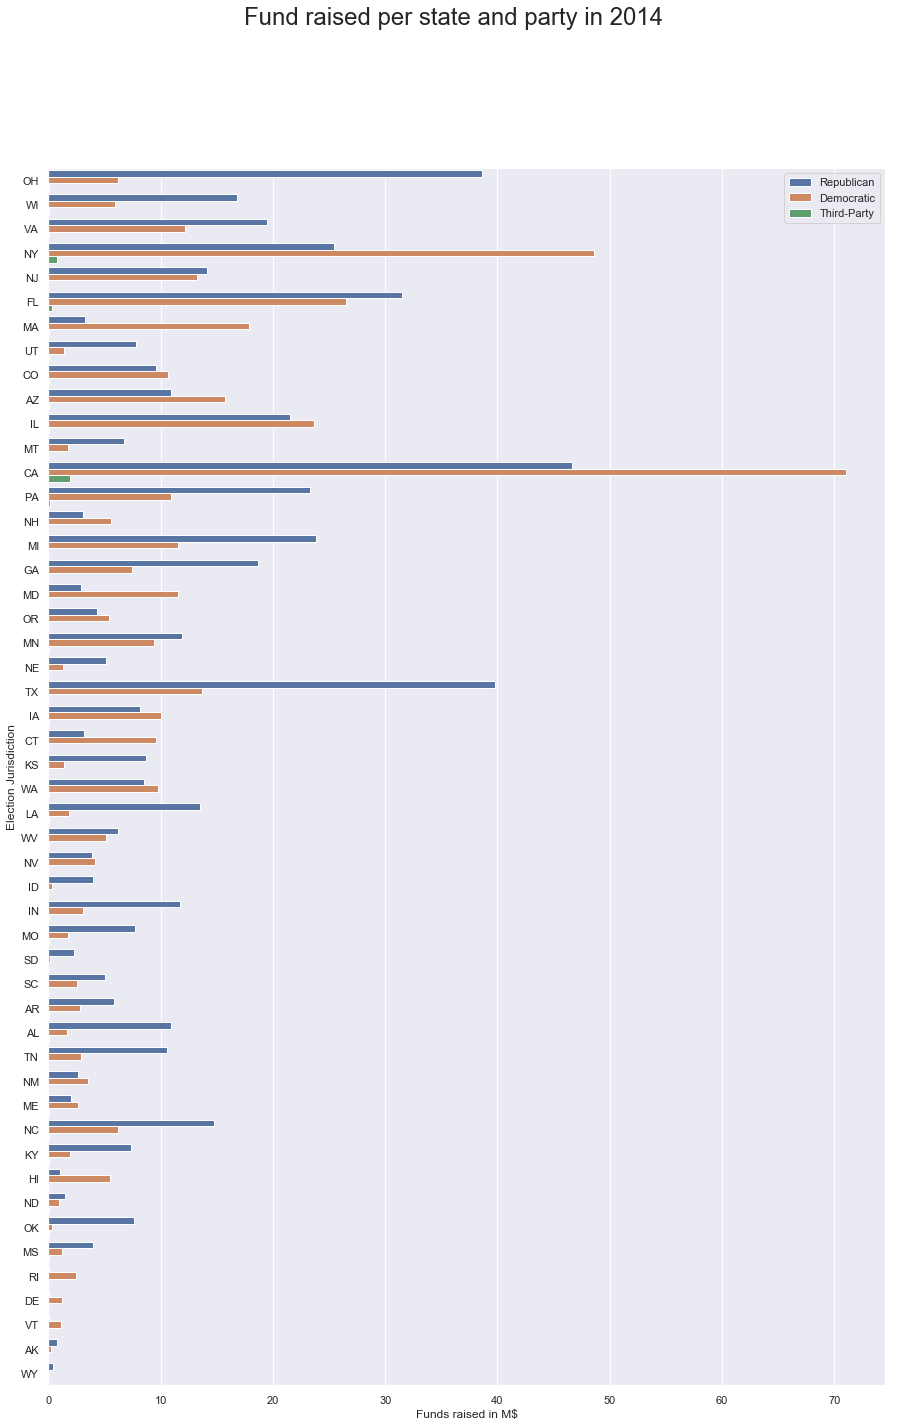

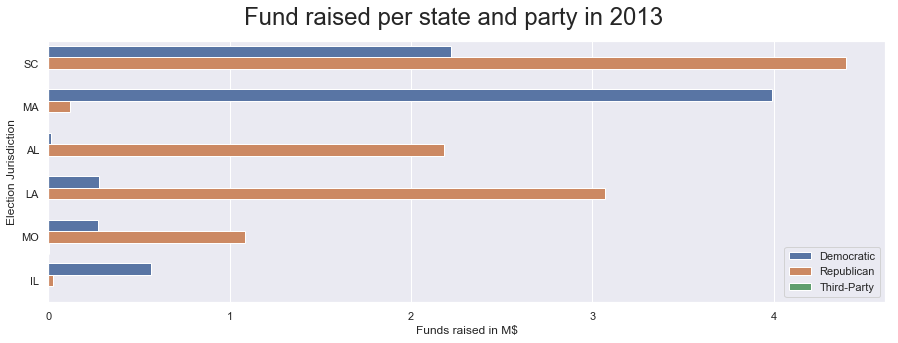

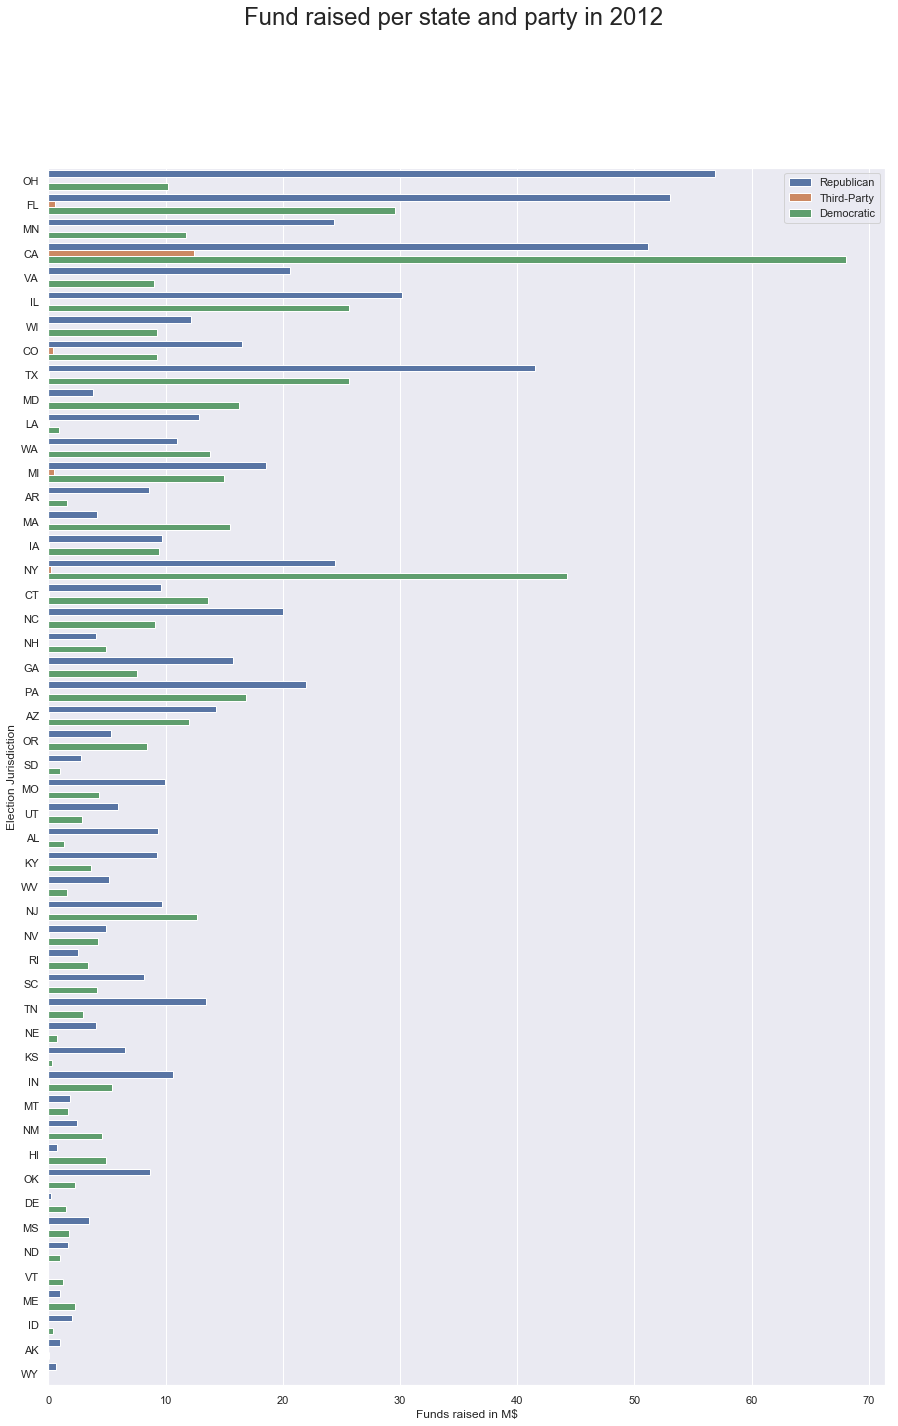

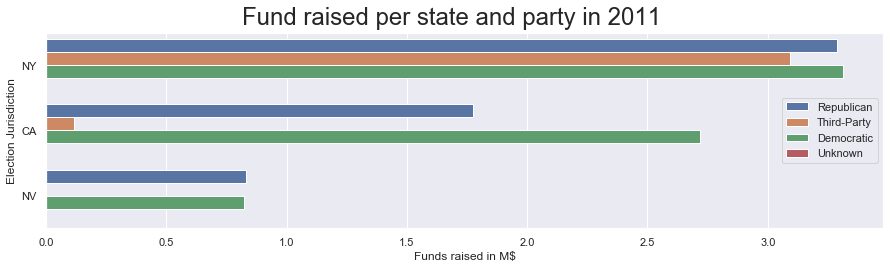

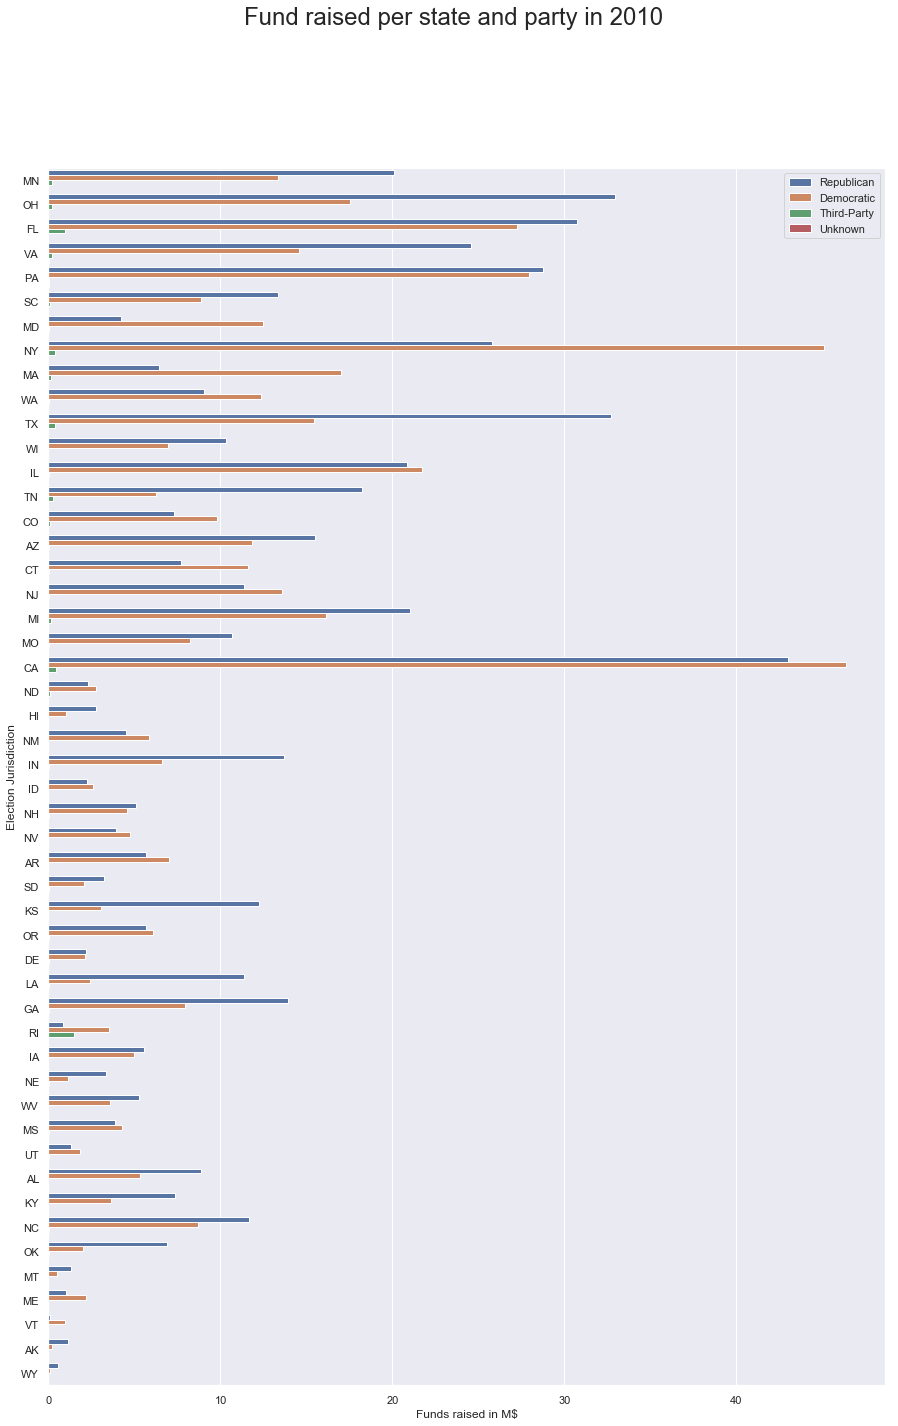

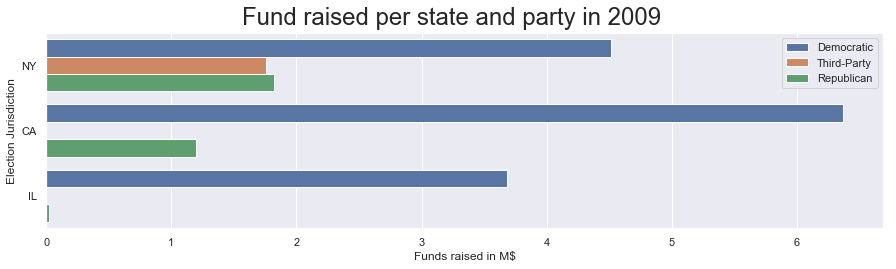

In [161]:
years=df2['Election_Year:id'].unique()
for year in years:
    data=df2[df2['Election_Year:id']==year].sort_values(['Total_M$'], ascending=False)
    #print(len(data['Election_Jurisdiction:id'].unique())/50*25)
    fig, ax = plt.subplots(1, 1, figsize=(15, ((len(data['Election_Jurisdiction:id'].unique())+6)/50*20))) #len(data)/52*20
    fig.suptitle('Fund raised per state and party in {}'.format(year), fontsize=24)
    #print(i, year)
    sns.barplot(y='Election_Jurisdiction:id', x='Total_M$', hue='General_Party', data=data, ax=ax, estimator =sum, ci=None)
    #set x label
    ax.set_xlabel('Funds raised in M$')
    #set y label
    ax.set_ylabel('Election Jurisdiction')
    #set title
    #ax[i].set_title('year {}'.format(year))
    #set legend
    ax.legend()

In [13]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

C:\ProgramData\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
query = 'Barack Obama'
choices = ['Barack H Obama', 'Barack H. Obama', 'B. Obama']
# Get a list of matches ordered by score, default limit to 5
process.extract(query, choices)
# [('Barack H Obama', 95), ('Barack H. Obama', 95), ('B. Obama', 85)]
 
# If we want only the top one
process.extractOne(query, choices)
# ('Barack H Obama', 95)

In [55]:
df3=df.groupby(['Election_Year:id', 'Office_Sought', 'General_Party'])['Total_$'].sum()
df3

Election_Year:id  Office_Sought             General_Party
2009              US HOUSE DISTRICT CA 010  Democratic       3271195.76
                                            Republican        842937.27
                                            Third-Party            0.00
                  US HOUSE DISTRICT CA 032  Democratic       3098647.57
                                            Republican        356962.14
                                            Third-Party            0.00
                  US HOUSE DISTRICT IL 005  Democratic       3682900.24
                                            Republican         26201.00
                                            Third-Party            0.00
                  US HOUSE DISTRICT NY 020  Democratic       3097444.09
                                            Republican       1447037.13
                  US HOUSE DISTRICT NY 023  Democratic       1420529.28
                                            Republican        377357.33
      

In [93]:
df4=pd.DataFrame(df3, columns=['Total_$']).reset_index(drop=False).groupby(['Election_Year:id', 'Office_Sought', 'General_Party'])['Total_$'].max()
df4=df4.reset_index(drop=False)
df4.head()

,Election_Year:id,Office_Sought,General_Party,Total_$
0,2009,US HOUSE DISTRICT CA 010,Democratic,3271195.76
1,2009,US HOUSE DISTRICT CA 010,Republican,842937.27
2,2009,US HOUSE DISTRICT CA 010,Third-Party,0.00
3,2009,US HOUSE DISTRICT CA 032,Democratic,3098647.57
4,2009,US HOUSE DISTRICT CA 032,Republican,356962.14
5,2009,US HOUSE DISTRICT CA 032,Third-Party,0.00
6,2009,US HOUSE DISTRICT IL 005,Democratic,3682900.24
7,2009,US HOUSE DISTRICT IL 005,Republican,26201.00
8,2009,US HOUSE DISTRICT IL 005,Third-Party,0.00
9,2009,US HOUSE DISTRICT NY 020,Democratic,3097444.09


In [122]:
df5=df4.copy()
df5['state_abbr']=df5['Office_Sought'].str.split(' ', expand=True)[3]
df5['district']=df5['Office_Sought'].str.split(' ', expand=True)[4]
df5['district']=df5['district'].astype(int)
df5['district']='District '+df5['district'].astype(str)
df5=df5.drop('Office_Sought', axis=1) #.columns=['year', 'party', 'Total_$', 'state_abbr', 'district']
df5.columns=['year', 'party', 'Total_$', 'state_abbr', 'district']
df5['party']=df5['party'].str.slice(0,1) #['D', 'R', 'T', 'U']
df5.head()

,year,party,Total_$,state_abbr,district
0,2009,D,3271195.76,CA,District 10
1,2009,R,842937.27,CA,District 10
2,2009,T,0.00,CA,District 10
3,2009,D,3098647.57,CA,District 32
4,2009,R,356962.14,CA,District 32


In [123]:
states = pd.read_csv('../data/states.csv')

In [133]:
df6=df5.join(states.set_index('Abbreviation'), on='state_abbr').copy()
df6.columns=['year', 'party', 'Total_$', 'state_abbr', 'district', 'state']
df6.head()

,year,party,Total_$,state_abbr,district,state
0,2009,D,3271195.76,CA,District 10,California
1,2009,R,842937.27,CA,District 10,California
2,2009,T,0.00,CA,District 10,California
3,2009,D,3098647.57,CA,District 32,California
4,2009,R,356962.14,CA,District 32,California


In [143]:
df7=df6.groupby(['year', 'state', 'district']).agg({'Total_$': 'max', 'party': 'first' })['party'].reset_index(drop=False)
df7.columns=['year', 'state', 'district', 'rich party']
df7.head()

,year,state,district,rich party
0,2009,California,District 10,D
1,2009,California,District 32,D
2,2009,Illinois,District 5,D
3,2009,New York,District 20,D
4,2009,New York,District 23,D


In [145]:
ballo_df = pd.read_csv('../data/ballotpedia/ballo_results.csv', index_col=0)
wikipedia_df = pd.read_csv('../data/wikipedia/house_results.csv', index_col=0)

merged_df =  pd.concat([wikipedia_df.loc[wikipedia_df['year'] < 2012], ballo_df])
display(merged_df.head())

,district,is_incumbent,name,party,percent,state,votes,won,year
1,District 19,NaN,Randy Neugebauer,R,78.0,Texas,106059.0,1,2010
2,District 19,NaN,Andy Wilson,D,19.0,Texas,25984.0,0,2010
3,District 19,NaN,Randy Neugebauer,R,72.0,Texas,168501.0,1,2008
4,District 19,NaN,Dwight Fullingim,D,25.0,Texas,58030.0,0,2008
5,District 19,NaN,Randy Neugebauer,R,68.0,Texas,92811.0,1,2006


In [152]:
df8=merged_df.join(df7.set_index(['year', 'state', 'district']), on=['year', 'state', 'district']).copy()
df8.head()

,district,is_incumbent,name,party,percent,state,votes,won,year,rich party
1,District 19,NaN,Randy Neugebauer,R,78.0,Texas,106059.0,1,2010,D
2,District 19,NaN,Andy Wilson,D,19.0,Texas,25984.0,0,2010,D
3,District 19,NaN,Randy Neugebauer,R,72.0,Texas,168501.0,1,2008,NaN
4,District 19,NaN,Dwight Fullingim,D,25.0,Texas,58030.0,0,2008,NaN
5,District 19,NaN,Randy Neugebauer,R,68.0,Texas,92811.0,1,2006,NaN


In [153]:
df8=merged_df.join(df6.set_index(['year', 'state', 'district', 'party']), on=['year', 'state', 'district', 'party']).copy()
df8.head()

,district,is_incumbent,name,party,percent,state,votes,won,year,Total_$,state_abbr
1,District 19,NaN,Randy Neugebauer,R,78.0,Texas,106059.0,1,2010,1105130.82,TX
2,District 19,NaN,Andy Wilson,D,19.0,Texas,25984.0,0,2010,51570.80,TX
3,District 19,NaN,Randy Neugebauer,R,72.0,Texas,168501.0,1,2008,NaN,NaN
4,District 19,NaN,Dwight Fullingim,D,25.0,Texas,58030.0,0,2008,NaN,NaN
5,District 19,NaN,Randy Neugebauer,R,68.0,Texas,92811.0,1,2006,NaN,NaN
